## **<font color=orange>Lecture Notes/Tutorials by Dr. Bilgic @RIT</font>**

# **Interactive Visualization with Plotly Dash**

### <font color=blue>Topic: Python Plotly Dash </font>

Your Task: 

1) Review the code, comments
2) Practice in a new notebook

---

# **Table of Contents** <a class="anchor" id="0.1"></a>

- [Dash Intro](#int)
- [Practices](#prc)
- [Problem Shooting Tips](pro)
- [References](#ref)

---

# Dash Intro <a class="anchor" id="int"></a>

- **Dash** is an open-source framework for building analytical applications, with no Javascript required, and it is tightly integrated with the Plotly graphing library. 

- **Plotly Dash** is a user interface library for creating analytical web applications. Those who use Python for data analysis, data exploration, visualization, modelling, instrument control, and reporting will find immediate use for Dash.

- Through a couple of simple patterns, Dash abstracts away all of the technologies and protocols that are required to build a **full-stack web app with interactive data visualization**.

- **Dash Enterprise** is the end-to-end development & deployment platform for low-code AI Dash applications. 

- **Plotly** stewards Python's leading data viz and UI libraries. With **Dash** Open Source, you can create data apps on your laptop in pure Python, no JavaScript required.

- Written on top of Plotly.js and React.js, Dash is ideal for building and deploying data apps with customized user interfaces. It's particularly suited for anyone who works with data.

- Dash apps are rendered in the **web browser**. You can deploy your apps to VMs or Kubernetes clusters and then share them through URLs. Since Dash apps are viewed in the web browser, Dash is inherently cross-platform and mobile ready.

**Now, visit one by one:**

- [Dash Core Components Gallery](https://dash.plotly.com/dash-core-components): See the capacities of interactive features.

- [Dash HTML Components Gallery](https://dash.plotly.com/dash-html-components): html-friendly dash components to embed.

- [Announcement Essay in 2017](https://medium.com/plotly/introducing-dash-5ecf7191b503): first article to introduce dash.

- [Dash Samples](https://dash.gallery/Portal/): Visit some designed samples in your interest.

- [This example](https://dash.gallery/ddk-oil-and-gas-demo/)

- [Start here to explore](https://dash.plotly.com/)


- Now, we will follow some of these tutorials. You can complete all yourself:

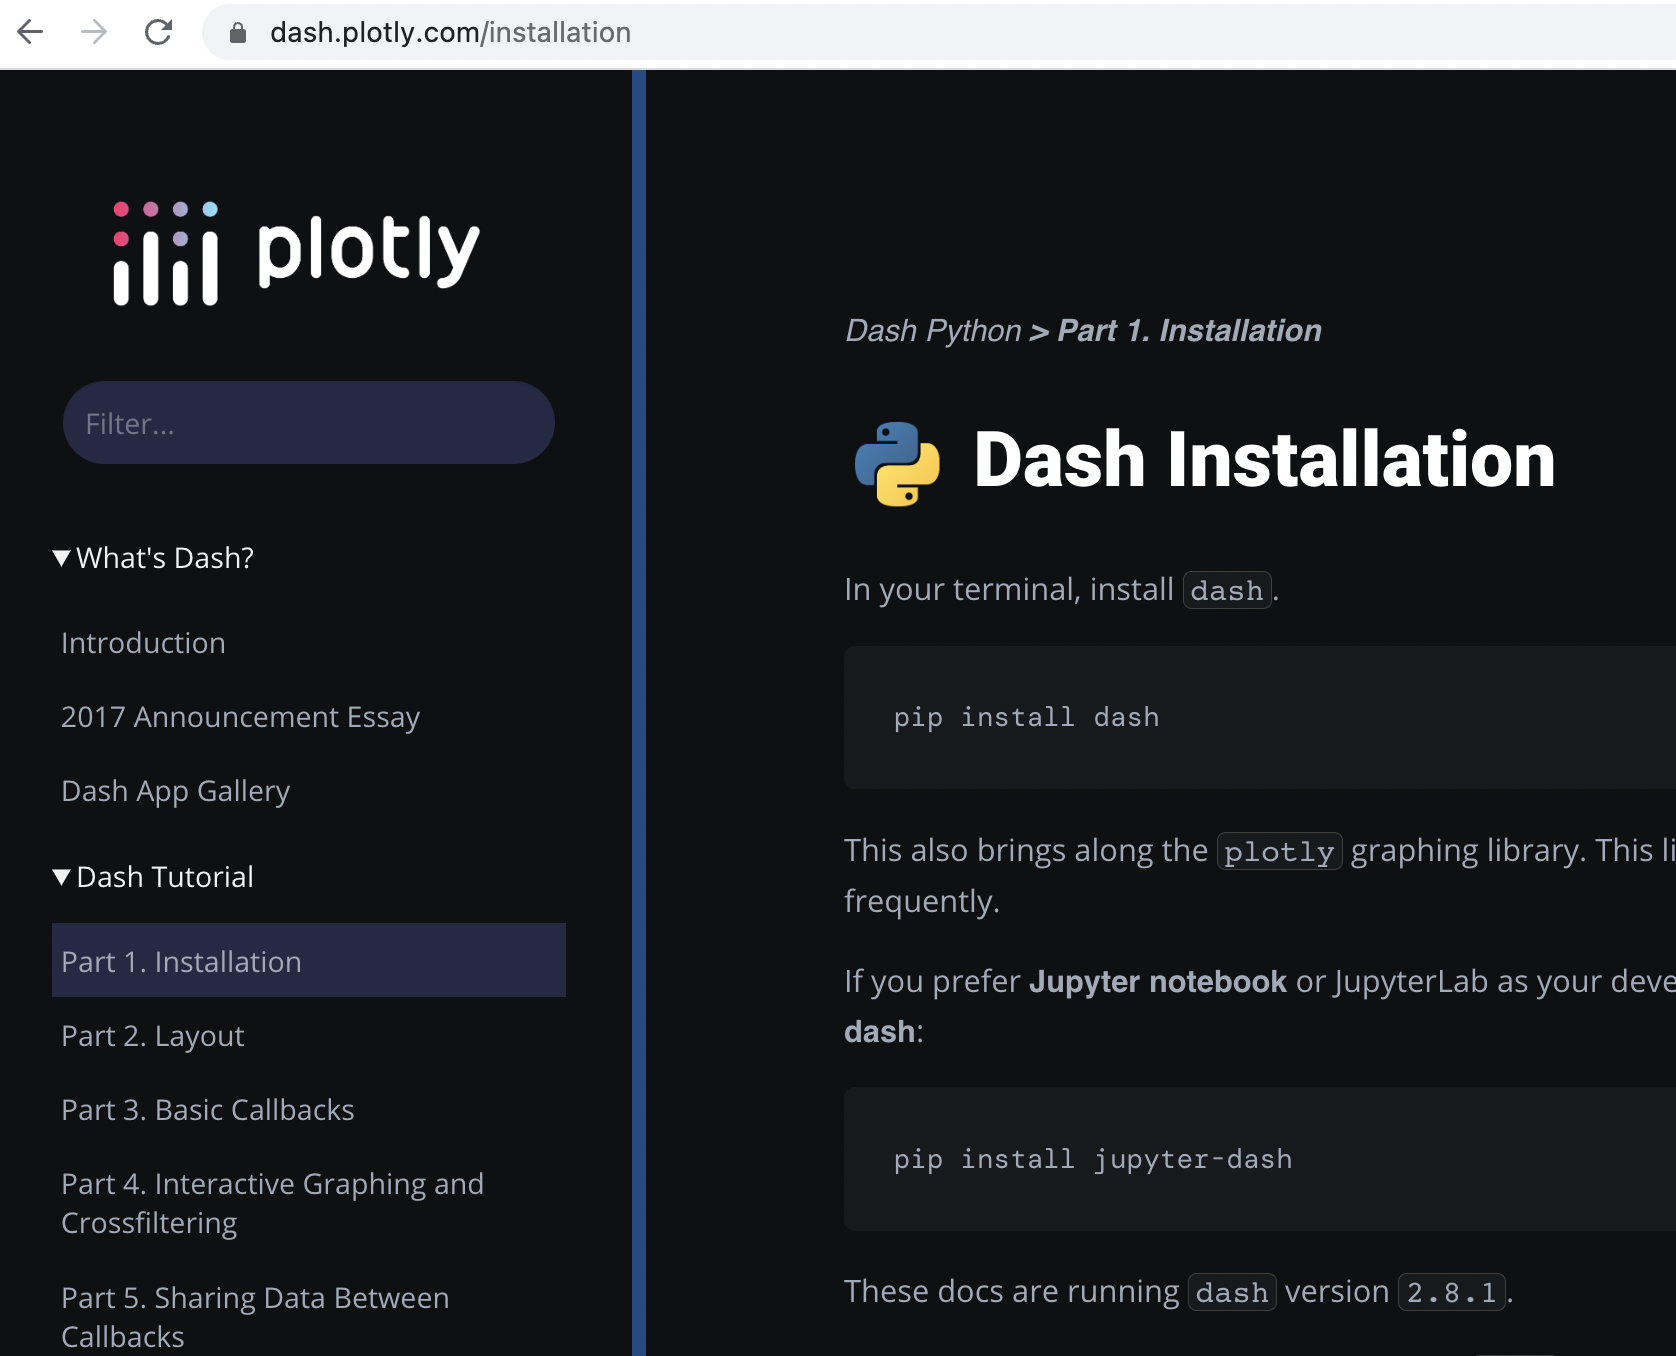

***

## Installation

You need to be patient:

- I assume you created an environment (say, it is a new one, **myvaenv**). if not, you can do it first: 

> conda env list

> conda create -n myvaenv python=3.09 anaconda #check if 3.09 installed

> conda env list

- Then open JupyterLab

> jupyter-lab

- Don't forget every time, you need to activate the env and deactivate once you are done.

> conda activate myvaenv #before opening the jupyterlab

> conda deactivate myvaenv #once you are done

- Make sure you don't have any issues with python installation, conda pack management etc.

**Now:**

- Install each one by one on the terminal. `conda` pack manager sometimes doesn't install correctly so use conda-forge as here > conda install -c conda-forge -c {whatever the pack is}

- Use pip if conda is not working properly (I don't recommend pip, however, it is problem solver).

The code pieces below are just optinal code when you need. Some do the same job:

> conda update conda #upgrading our pack manager. skip if you already installed anaconda distribution

> conda upgrade anaconda #upgrading the distribution

> conda update --all #will upgrade all packs

> conda update --all -c conda-forge

> conda install pandas #to install a pac

> conda install -c conda-forge pandas #this is better installation way for the headache packs like RISE and DASH 


**Now, terminal is starting:**


> conda activate myvaenv 

> conda install dash

> conda install jupyter-dash #or run the next line

> conda install -c conda-forge -c plotly jupyter-dash

> conda install dash --upgrade #if still issues continue!


- Then we should be done! If necessary, install other packs.

> conda list #for packs installed

- All are installed in the eniroenment: other env needs to be reinstalled. Whay so?

- Then, you need to import the installed packs on JupyterLab to use.

***

## Four ways to get the display of Plotly Dash

1. Inside the notebook app.run_server(mode='inline'): good to have the visualization inside the notebook. This is also good way for quickly displaying on small tasks.

2. Next to the notebook in jupyter app.run_server(mode='jupyterlab'): it allows you to see the code and application side-by side.

3. Externally app.run_server(mode='external'): The default display mode is app.run_server(mode='external'). In this mode, the run_server method will print out the application’s URL. This is a great choice when you want to see exactly what your application will look like to an end-user.

4. Displaying in a port with one .py file: run the .py file in terminal or call it from an integrated platform.

***

### Now, let's make our first Dash viz/app:

# Practice <a class="anchor" id="prc"></a>

### Review of Plotly Express

- Observe the capacisites of Plotly Express. Play with the code, uncomment all.

- Some features are needed: more interactive components etc.

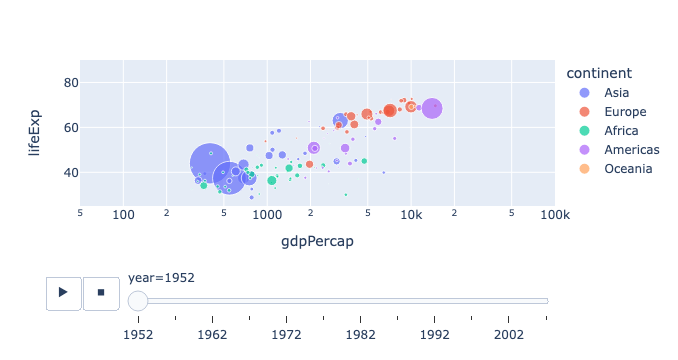

In [1]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
           size="pop", color="continent", hover_name="country", 
                 #facet_col="continent",
           log_x=True, size_max=45, range_x=[50,100000], range_y=[25,90])
fig.show()

In [ ]:
# df.shape
# df.describe(include='all')

***

# Plotly Dash Practices

## Example-1

- Let's display 3 contin. variables with one categorical in a scatterplot

In [13]:
# Dataset on tips

import plotly.express as px
df = px.data.tips()

# Data looks like this
df.head(5)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [1]:
# inline example
# import packs

import dash
import plotly.express as px

from jupyter_dash import JupyterDash

from dash import Dash, html, dcc, Input, Output

import pandas as pd

# Load Data
df = px.data.tips()

## Build App

# This is for inline
app = JupyterDash(__name__)

# This is for .py file port display
# app = dash.Dash(__name__)

# Create layout object 
app.layout = html.Div([
    html.H1("JupyterDash Demo-1: Tips data"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ]),
        
        
    ]),
])

# Define callback to update graph: This connects dash to plotly
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )

# Run app and display result inline in the notebook
app.run_server(mode='inline') #change to external, inline

# app.run_server(mode='jupyterlab')

## This is for one .py file and port
# if __name__ == '__main__':
#     app.run_server(debug=True, port=..., )

***

## Example-2

- This example may create lots of issues

- We will create .py file and run it with python in terminal. Make sure the py file is under the current directory in terminal.

- Get the code from here https://dash.plotly.com/layout

- Create a file named dash_2.py, and then run it with python dash_2.py.

- Them visit http://127.0.0.1:8050/ in your web browser.

- Press CTRL+C to quit

---

In [ ]:
# import packs 
import dash 
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash, html, dcc, Input, Output
import pandas

In [ ]:
# Check the working directory
pwd

In [1]:
# Don't run this here
# Copy this code into a ney .py. Then run with `python dash_2.py` in terminal
# Then visit http://127.0.0.1:8050/ in your web browser.

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
# from jupyter_dash import JupyterDash

# app = JupyterDash(__name__)
app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

#use cntl-C to quit.

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Traceback (most recent call last):
  File "/Users/yusufbilgic/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/yusufbilgic/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/Users/yusufbilgic/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/Users/yusufbilgic/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/Users/yusufbilgic/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 282, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/Users/yusufbilgic/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 229, in _bind_socket
    return self._try_bind_socket(s, port)
  F

SystemExit: 1

/Users/yusufbilgic/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



***

## Example-3

- Copy the first code in dash from https://plotly.com/python/plotly-express/#gallery, create a .py file and paste here. Then run python plotly-express.py in a terminal.

- You can download the file (plotly-express.py) from the web and run python plotly-express.py in a terminal.

- Then visit the port.

- Cntl-C to quit.

- When needed, restart Kernel and reconnect Kernel practices etc.


***

## Example-4

In [5]:
from plotly.express import data

df =  data.medals_long()

df.nation.unique()

array(['South Korea', 'China', 'Canada'], dtype=object)

In [7]:
from dash import Dash, dcc, html, Input, Output
from plotly.express import data
import pandas as pd

df =  data.medals_long()

#app = Dash(__name__)
app = JupyterDash(__name__)

app.layout = html.Div([
    
    dcc.Dropdown(df.nation.unique(), 
                 id='pandas-dropdown-2'),
    
    html.Div(id='pandas-output-container-2')
])


@app.callback(
    Output('pandas-output-container-2', 'children'),
    Input('pandas-dropdown-2', 'value')
)
def update_output(value):
    return f'You have selected {value}'


app.run_server(mode='inline') #change to external, inline

# if __name__ == '__main__':
#     app.run_server(debug=True)

***

***

# Problem Shooting Section

## How to kill an open port: an example

- The port is http://127.0.0.1:8050/, basically, 8050 to be killed:

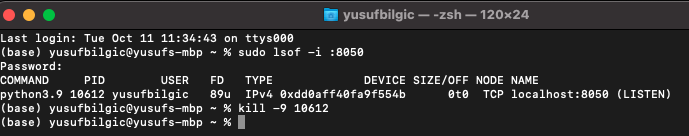

***

In [7]:
import os

#Get the current working directory: os.getcwd()
path = os.getcwd()
print(path)

#'/Users/ykbics/Library/CloudStorage/GoogleDrive-yusuf.k.bilgic@gmail.com/My Drive/Data Science All/My_All_ML_Course_Materials/1.DataAnalytics/2. Data Analysis and Visualization with Python/RIT_Visualization_with_Python_Plotly_Dash'


/Users/ykbics/Library/CloudStorage/GoogleDrive-yusuf.k.bilgic@gmail.com/My Drive/Data Science All/My_All_ML_Course_Materials/1.DataAnalytics/2. Data Analysis and Visualization with Python/RIT_Visualization_with_Python_Plotly_Dash


In [12]:
#Change the current working directory: os.chdir()
#os.chdir()
os.chdir(os.path.dirname(os.path.abspath('/Users/ykbics/Library/CloudStorage/GoogleDrive-yusuf.k.bilgic@gmail.com/My Drive/Data Science All/My_All_ML_Course_Materials/1.DataAnalytics/2. Data Analysis and Visualization with Python/RIT_Visualization_with_Python_Plotly_Dash')))

# Now, check it
path = os.getcwd()
print(path)

/Users/ykbics/Library/CloudStorage/GoogleDrive-yusuf.k.bilgic@gmail.com/My Drive/Data Science All/My_All_ML_Course_Materials/1.DataAnalytics/2. Data Analysis and Visualization with Python


***

# **References** <a class="anchor" id="ref"></a>

- [JupyterDash and Example-1](https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e)
- [Dash Layout and Example 2](https://dash.plotly.com/layout)
